## You're here! 
Welcome to your first competition in the [ITI's AI Pro training program](https://ai.iti.gov.eg/epita/ai-engineer/)! We hope you enjoy and learn as much as we did prepairing this competition.


## Introduction

In the competition, it's required to predict the `Severity` of a car crash given info about the crash, e.g., location.

This is the getting started notebook. Things are kept simple so that it's easier to understand the steps and modify it.

Feel free to `Fork` this notebook and share it with your modifications **OR** use it to create your submissions.

### Prerequisites
You should know how to use python and a little bit of Machine Learning. You can apply the techniques you learned in the training program and submit the new solutions! 

### Checklist
You can participate in this competition the way you perefer. However, I recommend following these steps if this is your first time joining a competition on Kaggle.

* Fork this notebook and run the cells in order.
* Submit this solution.
* Make changes to the data processing step as you see fit.
* Submit the new solutions.

*You can submit up to 5 submissions per day. You can select only one of the submission you make to be considered in the final ranking.*


Don't hesitate to leave a comment or contact me if you have any question!

## Import the libraries

We'll use `pandas` to load and manipulate the data. Other libraries will be imported in the relevant sections.

In [1]:
# Libraries 
import pandas as pd
import numpy as np
import os 

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

from datetime  import datetime as dt

pd.set_option('display.max_columns', 70) # Since we're dealing with moderately sized dataframe,
pd.set_option('display.max_rows', 13)# max 13 columns and rows will be shown

## Exploratory Data Analysis
In this step, one should load the data and analyze it. However, I'll load the data and do minimal analysis. You are encouraged to do thorough analysis!

Let's load the data using `pandas` and have a look at the generated `DataFrame`.

In [2]:
# upload dataset train
dataset_path = '/kaggle/input/car-crashes-severity-prediction/'
df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
print("The shape of the dataset is {}.\n\n".format(df.shape))
df.head()
#df['timestamp'] = pd.to_datetime(df.timestamp)
# drop the Null values from  train dataset
df=df.dropna() 
df.isnull().sum().sum()

df.info()

The shape of the dataset is (6407, 16).


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6407 entries, 0 to 6406
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6407 non-null   int64  
 1   Lat           6407 non-null   float64
 2   Lng           6407 non-null   float64
 3   Bump          6407 non-null   bool   
 4   Distance(mi)  6407 non-null   float64
 5   Crossing      6407 non-null   bool   
 6   Give_Way      6407 non-null   bool   
 7   Junction      6407 non-null   bool   
 8   No_Exit       6407 non-null   bool   
 9   Railway       6407 non-null   bool   
 10  Roundabout    6407 non-null   bool   
 11  Stop          6407 non-null   bool   
 12  Amenity       6407 non-null   bool   
 13  Side          6407 non-null   object 
 14  Severity      6407 non-null   int64  
 15  timestamp     6407 non-null   object 
dtypes: bool(9), float64(3), int64(2), object(2)
memory usage: 456.7+ KB


<Figure size 432x288 with 0 Axes>

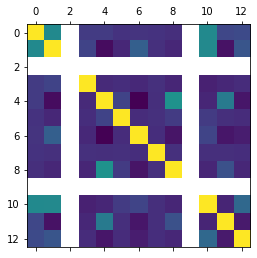

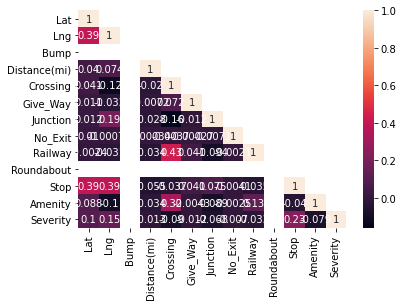

/opt/conda/lib/python3.7/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Severity
Lat,1.000000,0.388177,nan,0.039760,0.040971,0.011296,0.012027,0.010412,-0.002388,nan,0.390530,0.088219,0.099581
Lng,0.388177,1.000000,nan,0.074003,-0.123170,-0.032626,0.191309,-0.000733,-0.030877,nan,0.385575,-0.102261,0.145313
Bump,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Distance(mi),0.039760,0.074003,nan,1.000000,-0.020309,-0.007164,-0.028275,0.000341,-0.033987,nan,-0.054533,-0.033825,-0.013141
Crossing,0.040971,-0.123170,nan,-0.020309,1.000000,0.072222,-0.160848,-0.003744,0.430823,nan,-0.037446,0.319284,-0.090314
Give_Way,0.011296,-0.032626,nan,-0.007164,0.072222,1.000000,-0.012378,-0.000270,0.041317,nan,0.041475,-0.004251,-0.012186
Junction,0.012027,0.191309,nan,-0.028275,-0.160848,-0.012378,1.000000,-0.007145,-0.094416,nan,0.075290,-0.089347,-0.068328
No_Exit,0.010412,-0.000733,nan,0.000341,-0.003744,-0.000270,-0.007145,1.000000,-0.002063,nan,-0.004111,-0.002454,-0.007034
Railway,-0.002388,-0.030877,nan,-0.033987,0.430823,0.041317,-0.094416,-0.002063,1.000000,nan,-0.034703,0.126759,-0.033322
Roundabout,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [3]:
# correlation of train data
corrMatrix = df.drop(columns='ID').corr()
plt.figure()
plt.matshow(corrMatrix)
plt.show()

mask = np.array(corrMatrix)

mask[np.tril_indices_from(mask)] = False

plt.figure()
sns.heatmap(corrMatrix,mask=mask, annot=True)
plt.show()

corrMatrix.style.background_gradient(cmap='coolwarm')

#print (df[df['Bump'].contains("TRUE")])
#print (df[df['Roundabout'].contains("TRUE")])

In [4]:
#convert categorical values to numerical 
df['Crossing']=df['Crossing'].map({True:1,False:0})
df['Junction']=df['Junction'].map({True:1,False:0})
df['Stop']=df['Stop'].map({True:1,False:0})
df['Amenity']=df['Amenity'].map({True:1,False:0})
df['Railway']=df['Railway'].map({True:1,False:0})
#df['Give_Way']=df['Give_Way'].map({True:1,False:0})  ##
#df['Side']=df['Side'].map({'R':1,'L':0}) ##

# Display first 5 rows
df.head()
df.Railway.unique()

array([0, 1])

We've got 6407 examples in the dataset with 14 featues, 1 ID, and the `Severity` of the crash.

By looking at the features and a sample from the data, the features look of numerical and catogerical types. What about some descriptive statistics?

The output shows desciptive statistics for the numerical features, `Lat`, `Lng`, `Distance(mi)`, and `Severity`. I'll use the numerical features to demonstrate how to train the model and make submissions. **However you shouldn't use the numerical features only to make the final submission if you want to make it to the top of the leaderboard.**

In [5]:
# Extraxt the date from timestamp feature 
df.drop(columns='ID').describe()
df['timestamp'] = pd.to_datetime(df.timestamp)
df.info()

df['timestamp'] = df['timestamp'].dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6407 entries, 0 to 6406
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            6407 non-null   int64         
 1   Lat           6407 non-null   float64       
 2   Lng           6407 non-null   float64       
 3   Bump          6407 non-null   bool          
 4   Distance(mi)  6407 non-null   float64       
 5   Crossing      6407 non-null   int64         
 6   Give_Way      6407 non-null   bool          
 7   Junction      6407 non-null   int64         
 8   No_Exit       6407 non-null   bool          
 9   Railway       6407 non-null   int64         
 10  Roundabout    6407 non-null   bool          
 11  Stop          6407 non-null   int64         
 12  Amenity       6407 non-null   int64         
 13  Side          6407 non-null   object        
 14  Severity      6407 non-null   int64         
 15  timestamp     6407 non-null   datetime

## Data Splitting

Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio. 

*Note: a good way to generate reproducible results is to set the seed to the algorithms that depends on randomization. This is done with the argument `random_state` in the following command* 

In [6]:
# Data Spliting
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42) # Try adding `stratify` here

X_train = train_df.drop(columns=['ID', 'Severity'])
y_train = train_df['Severity']

X_val = val_df.drop(columns=['ID', 'Severity'])
y_val = val_df['Severity']


As pointed out eariler, I'll use the numerical features to train the classifier. **However, you shouldn't use the numerical features only to make the final submission if you want to make it to the top of the leaderboard.** 

# **Model Training**

In [7]:
# Model Training
# This cell is used to select the numerical features. IT SHOULD BE REMOVED AS YOU DO YOUR WORK.
X_train = X_train[['Lat', 'Lng', 'Junction','Crossing','Stop','Amenity','Railway']]
X_val = X_val[['Lat', 'Lng','Junction','Crossing','Stop','Amenity','Railway']]

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classifier
#estim.fit(X_train.values, y_train.values)
classifier = classifier.fit(X_train.values, y_train.values)

In [9]:
print("The accuracy of the classifier on the validation set is ", (classifier.score(X_val, y_val)))

The accuracy of the classifier on the validation set is  0.7418096723868954


In [10]:
# Read dataset weather 
dataset_path = '/kaggle/input/car-crashes-severity-prediction/'
df1 = pd.read_csv(os.path.join(dataset_path, 'weather-sfcsv.csv'))
print("The shape of the dataset is {}.\n\n".format(df.shape))



# df1 = df1.fillna(value=df1.median())
# df1
# df1 = df1.dropna() 
print(df1.isnull().sum())

The shape of the dataset is (6407, 16).


Year                    0
Day                     0
Month                   0
Hour                    0
Weather_Condition       1
Wind_Chill(F)        3609
Precipitation(in)    3327
Temperature(F)          2
Humidity(%)             2
Wind_Speed(mph)       345
Visibility(mi)          1
Selected                0
dtype: int64


## Model Training

Let's train a model with the data! We'll train a Random Forest Classifier to demonstrate the process of making submissions. 

In [11]:
#Merge the weather dataset with the train dataset
import datetime as dt
cols = ['Year', 'Month', 'Day']
df1['Time_combined'] = df1[cols].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)

df1['Time_combined']= pd.to_datetime(df1['Time_combined'])

print("no. of duplicates =", df1["Time_combined"].duplicated().sum())
df1["Time_combined"] = df1.drop_duplicates(subset=['Time_combined'])
#print("no. of duplicates =", df1["Time_combined"].duplicated().sum())
df1.shape

no. of duplicates = 5309


(6901, 13)

In [12]:
# extracting  date from timestamp
df1['Time_combined']= pd.to_datetime(df1['Time_combined'])

df['timestamp'] = pd.to_datetime(df['timestamp'])

df.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
0,0,37.762150,-122.405660,False,0.044,0,False,0,False,0,False,0,1,R,2,2016-03-25
1,1,37.719157,-122.448254,False,0.000,0,False,0,False,0,False,0,0,R,2,2020-05-05
2,2,37.808498,-122.366852,False,0.000,0,False,0,False,0,False,1,0,R,3,2016-09-16
3,3,37.785930,-122.391080,False,0.009,0,False,1,False,0,False,0,0,R,1,2020-03-29
4,4,37.719141,-122.448457,False,0.000,0,False,0,False,0,False,0,0,R,2,2019-10-09


In [13]:
# Merge training dataset with weather dataset
df_merged=pd.merge(df, df1, how='left', left_on='timestamp',right_on='Time_combined')
df_merged
df_merged.info()
print(df_merged.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6407 entries, 0 to 6406
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 6407 non-null   int64         
 1   Lat                6407 non-null   float64       
 2   Lng                6407 non-null   float64       
 3   Bump               6407 non-null   bool          
 4   Distance(mi)       6407 non-null   float64       
 5   Crossing           6407 non-null   int64         
 6   Give_Way           6407 non-null   bool          
 7   Junction           6407 non-null   int64         
 8   No_Exit            6407 non-null   bool          
 9   Railway            6407 non-null   int64         
 10  Roundabout         6407 non-null   bool          
 11  Stop               6407 non-null   int64         
 12  Amenity            6407 non-null   int64         
 13  Side               6407 non-null   object        
 14  Severity

In [14]:
# Sort and then drop all duplicate values
df_merged.sort_values("timestamp", inplace = True)
 
print("no. of duplicates =", df.duplicated().sum())
df_merged.drop_duplicates(subset ="timestamp", keep = False, inplace = True)
print("no. of duplicates =", df.duplicated().sum())


no. of duplicates = 0
no. of duplicates = 0


<Figure size 432x288 with 0 Axes>

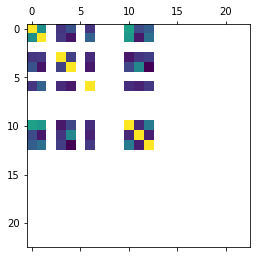

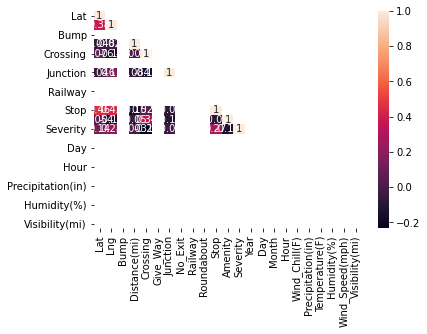

/opt/conda/lib/python3.7/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Severity,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi)
Lat,1.000000,0.382187,nan,-0.047980,0.075676,nan,-0.045754,nan,nan,nan,0.461242,0.054308,0.136650,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Lng,0.382187,1.000000,nan,-0.028804,-0.163421,nan,0.154722,nan,nan,nan,0.424569,-0.147197,0.216570,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bump,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Distance(mi),-0.047980,-0.028804,nan,1.000000,-0.001132,nan,-0.083563,nan,nan,nan,-0.150500,-0.049973,-0.003148,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Crossing,0.075676,-0.163421,nan,-0.001132,1.000000,nan,-0.150384,nan,nan,nan,0.027133,0.340618,-0.233707,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Give_Way,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Junction,-0.045754,0.154722,nan,-0.083563,-0.150384,nan,1.000000,nan,nan,nan,-0.069979,-0.112734,-0.029880,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
No_Exit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Railway,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Roundabout,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [15]:
#displaying correlation between merged dataframe
corrMatrix = df_merged.drop(columns='ID').corr()
plt.figure()
plt.matshow(corrMatrix)
plt.show()

mask = np.array(corrMatrix)

mask[np.tril_indices_from(mask)] = False

plt.figure()
sns.heatmap(corrMatrix,mask=mask, annot=True)
plt.show()

corrMatrix.style.background_gradient(cmap='coolwarm')

#print (df[df['Bump'].contains("TRUE")])
#print (df[df['Roundabout'].contains("TRUE")])

In [16]:
#training datamodel
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df_merged, test_size=0.2, random_state=42) # Try adding `stratify` here

X_train = train_df.drop(columns=['ID', 'Severity','Bump','Roundabout','Distance(mi)'])
y_train = train_df['Severity']

X_val = val_df.drop(columns=['ID', 'Severity','Bump','Roundabout','Distance(mi)'])
y_val = val_df['Severity']
df_merged.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,Time_combined
3477,3477,37.737060,-122.402860,False,0.492,0,False,0,False,0,False,0,0,R,3,2016-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
6288,6288,37.778088,-122.401169,False,0.000,0,False,0,False,0,False,0,0,R,3,2016-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2477,2477,37.769375,-122.405533,False,0.000,0,False,0,False,0,False,0,0,R,3,2016-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
761,761,37.785542,-122.391380,False,0.000,0,False,1,False,0,False,0,0,R,3,2016-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3884,3884,37.750099,-122.392250,False,0.000,0,False,0,False,0,False,0,0,R,2,2016-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [17]:
# from scipy.stats import norm
# from scipy import stats
# #histogram and normal probability plot
# sns.distplot(df_merged['Humidity(%)'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(df_merged['Humidity(%)'], plot=plt)
# plt.show()

In [18]:
# # This cell is used to select the numerical features. IT SHOULD BE REMOVED AS YOU DO YOUR WORK.
# X_train = X_train[['Lat', 'Lng', 'Junction','Crossing','Stop','Amenity','Railway','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Wind_Chill(F)','Humidity(%)','Temperature(F)']]
# X_val = X_val[['Lat', 'Lng', 'Junction','Crossing','Stop','Amenity','Railway','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Wind_Chill(F)','Humidity(%)','Temperature(F)']]

In [19]:
# This cell is used to select the numerical features. IT SHOULD BE REMOVED AS YOU DO YOUR WORK.
X_train = X_train[['Lat', 'Lng', 'Junction','Crossing','Stop','Amenity']]
X_val = X_val[['Lat', 'Lng', 'Junction','Crossing','Stop','Amenity']]

In [20]:
X_train

,Lat,Lng,Junction,Crossing,Stop,Amenity
3988,37.774044,-122.405899,0,0,0,0
2197,37.761826,-122.405864,1,0,0,0
5828,37.719624,-122.448410,0,0,0,0
373,37.786320,-122.472641,0,1,0,0
2161,37.719162,-122.448273,0,0,0,0
...,...,...,...,...,...,...
1438,37.775979,-122.404821,1,0,0,0
133,37.769375,-122.405533,0,0,0,0
731,37.807072,-122.475616,0,0,0,0
5279,37.735237,-122.406586,0,0,0,0


In [21]:
 

# mean_vis = X_train['Visibility(mi)'].median()
# X_train['Visibility(mi)'] = X_train['Visibility(mi)'].fillna(mean_vis)

# mean_wind = X_train['Wind_Speed(mph)'].median()
# X_train['Wind_Speed(mph)'] = X_train['Wind_Speed(mph)'].fillna(mean_wind)

# mean_per = X_train['Precipitation(in)'].median()
# X_train['Precipitation(in)'] = X_train['Precipitation(in)'].fillna(mean_per)

# mean_temp = X_train['Temperature(F)'].median()
# X_train['Temperature(F)'] = X_train['Temperature(F)'].fillna(mean_temp)

# mean_hum = X_train['Humidity(%)'].median()
# X_train['Humidity(%)'] = X_train['Humidity(%)'].fillna(mean_hum)

# mean_chill = X_train['Wind_Chill(F)'].median()
# X_train['Wind_Chill(F)'] = X_train['Wind_Chill(F)'].fillna(mean_chill)




In [22]:
X_train

,Lat,Lng,Junction,Crossing,Stop,Amenity
3988,37.774044,-122.405899,0,0,0,0
2197,37.761826,-122.405864,1,0,0,0
5828,37.719624,-122.448410,0,0,0,0
373,37.786320,-122.472641,0,1,0,0
2161,37.719162,-122.448273,0,0,0,0
...,...,...,...,...,...,...
1438,37.775979,-122.404821,1,0,0,0
133,37.769375,-122.405533,0,0,0,0
731,37.807072,-122.475616,0,0,0,0
5279,37.735237,-122.406586,0,0,0,0


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classifier
classifier = classifier.fit(X_train, y_train)

Now let's test our classifier on the validation dataset and see the accuracy.

In [24]:
print("The accuracy of the classifier on the validation set is ", (classifier.score(X_val, y_val)))

The accuracy of the classifier on the validation set is  0.6896551724137931


Well. That's a good start, right? A classifier that predicts all examples' `Severity` as 2 will get around 0.63. You should get better score as you add more features and do better data preprocessing.

## Submission File Generation

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 

First, we'll load the data.

In [25]:
test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
test_df.head()
test_df=test_df.dropna() 
test_df.isnull().sum().sum()

0

In [26]:
#convert categorical values to numerical 
test_df['Crossing']=test_df['Crossing'].map({True:1,False:0})
test_df['Junction']=test_df['Junction'].map({True:1,False:0})
test_df['Stop']=test_df['Stop'].map({True:1,False:0})
test_df['Amenity']=test_df['Amenity'].map({True:1,False:0})
test_df['Railway']=test_df['Railway'].map({True:1,False:0})
#df['Give_Way']=df['Give_Way'].map({True:1,False:0})  ##
#df['Side']=df['Side'].map({'R':1,'L':0}) ##

# Display first 5 rows
test_df.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp
0,6407,37.786060,-122.390900,False,0.039,0,False,1,False,0,False,0,0,R,2016-04-04 19:20:31
1,6408,37.769609,-122.415057,False,0.202,0,False,0,False,0,False,0,0,R,2020-10-28 11:51:00
2,6409,37.807495,-122.476021,False,0.000,0,False,0,False,0,False,0,0,R,2019-09-09 07:36:45
3,6410,37.761818,-122.405869,False,0.000,0,False,1,False,0,False,0,0,R,2019-08-06 15:46:25
4,6411,37.732350,-122.414100,False,0.670,0,False,0,False,0,False,0,0,R,2018-10-17 09:54:58


In [27]:
from datetime  import datetime as dt
test_df.drop(columns='ID').describe()
test_df['timestamp'] = pd.to_datetime(test_df.timestamp)

test_df.info()

test_df['timestamp'] = test_df['timestamp'].dt.date
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 0 to 1600
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            1601 non-null   int64         
 1   Lat           1601 non-null   float64       
 2   Lng           1601 non-null   float64       
 3   Bump          1601 non-null   bool          
 4   Distance(mi)  1601 non-null   float64       
 5   Crossing      1601 non-null   int64         
 6   Give_Way      1601 non-null   bool          
 7   Junction      1601 non-null   int64         
 8   No_Exit       1601 non-null   bool          
 9   Railway       1601 non-null   int64         
 10  Roundabout    1601 non-null   bool          
 11  Stop          1601 non-null   int64         
 12  Amenity       1601 non-null   int64         
 13  Side          1601 non-null   object        
 14  timestamp     1601 non-null   datetime64[ns]
dtypes: bool(4), datetime64[ns](1), float64

In [28]:
# Extracting  date from timestamp
from datetime import datetime 

df1['Time_combined']= pd.to_datetime(df1['Time_combined'])


test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])

test_df.head()
df1


,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,Time_combined
0,2020,27,7,18,Fair,64.0,0.00,64.0,70.0,20.0,10.0,No,1970-01-01 00:00:00.000002020
1,2017,30,9,17,Partly Cloudy,NaN,NaN,71.1,57.0,9.2,10.0,No,1970-01-01 00:00:00.000002017
2,2017,27,6,5,Overcast,NaN,NaN,57.9,87.0,15.0,9.0,No,1970-01-01 00:00:00.000002017
3,2016,7,9,9,Clear,NaN,NaN,66.9,73.0,4.6,10.0,No,1970-01-01 00:00:00.000002016
4,2019,19,10,2,Fair,52.0,0.00,52.0,89.0,0.0,9.0,No,1970-01-01 00:00:00.000002019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,2018,23,1,21,Clear,NaN,NaN,51.1,80.0,3.5,10.0,No,NaT
6897,2019,16,6,7,Cloudy,56.0,0.00,56.0,80.0,9.0,9.0,No,NaT
6898,2017,7,2,4,Rain,NaN,0.07,61.0,90.0,32.2,7.0,No,NaT
6899,2016,22,4,16,Mostly Cloudy,NaN,NaN,61.0,67.0,21.9,10.0,No,NaT


In [29]:
df1 = pd.to_datetime(df1['Time_combined'])

In [30]:
# merge training dataset with weather dataset
test_merged=pd.merge(test_df, df1, how='left', left_on='timestamp',right_on='Time_combined')
test_merged
test_merged.info()
test_merged.shape
print(test_merged.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 0 to 1600
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             1601 non-null   int64         
 1   Lat            1601 non-null   float64       
 2   Lng            1601 non-null   float64       
 3   Bump           1601 non-null   bool          
 4   Distance(mi)   1601 non-null   float64       
 5   Crossing       1601 non-null   int64         
 6   Give_Way       1601 non-null   bool          
 7   Junction       1601 non-null   int64         
 8   No_Exit        1601 non-null   bool          
 9   Railway        1601 non-null   int64         
 10  Roundabout     1601 non-null   bool          
 11  Stop           1601 non-null   int64         
 12  Amenity        1601 non-null   int64         
 13  Side           1601 non-null   object        
 14  timestamp      1601 non-null   datetime64[ns]
 15  Time_combined  0 non-

In [31]:
# test_merged.drop_duplicates(subset="Time_combined", inplace=True)


In [32]:
test_merged.shape

(1601, 16)

In [33]:
# dropping all duplicate values
print(test_df.isnull().sum().sum())
# test_merged.drop_duplicates(subset="timestamp", inplace=True)
test_merged.shape
test_merged.info()
# test_merged.sort_values("timestamp", inplace = True)
 
# Dropping all null values
# test_merged.drop_duplicates(subset ="timestamp", keep = False, inplace = True)
# test_merged.dropna()
test_merged.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 0 to 1600
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             1601 non-null   int64         
 1   Lat            1601 non-null   float64       
 2   Lng            1601 non-null   float64       
 3   Bump           1601 non-null   bool          
 4   Distance(mi)   1601 non-null   float64       
 5   Crossing       1601 non-null   int64         
 6   Give_Way       1601 non-null   bool          
 7   Junction       1601 non-null   int64         
 8   No_Exit        1601 non-null   bool          
 9   Railway        1601 non-null   int64         
 10  Roundabout     1601 non-null   bool          
 11  Stop           1601 non-null   int64         
 12  Amenity        1601 non-null   int64         
 13  Side           1601 non-null   object        
 14  timestamp      1601 non-null   datetime64[ns]
 15  Time_combined  0 no

Note that the test set has the same features and doesn't have the `Severity` column.
At this stage one must **NOT** forget to apply the same processing done on the training set on the features of the test set.

Now we'll add `Severity` column to the test `DataFrame` and add the values of the predicted class to it.

**I'll select the numerical features here as I did in the training set. DO NOT forget to change this step as you change the preprocessing of the training data.**

In [34]:
X_test = test_merged.drop(columns=['ID'])

# You should update/remove the next line once you change the features used for training
X_test = X_test[['Lat', 'Lng', 'Junction','Crossing','Stop','Amenity']]

y_test_predicted = classifier.predict(X_test)

test_df['Severity'] = y_test_predicted

test_df.head()
#,'Railway','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Wind_Chill(F)','Humidity(%)','Temperature(F)'


,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp,Severity
0,6407,37.786060,-122.390900,False,0.039,0,False,1,False,0,False,0,0,R,2016-04-04,2
1,6408,37.769609,-122.415057,False,0.202,0,False,0,False,0,False,0,0,R,2020-10-28,2
2,6409,37.807495,-122.476021,False,0.000,0,False,0,False,0,False,0,0,R,2019-09-09,2
3,6410,37.761818,-122.405869,False,0.000,0,False,1,False,0,False,0,0,R,2019-08-06,2
4,6411,37.732350,-122.414100,False,0.670,0,False,0,False,0,False,0,0,R,2018-10-17,2


Now we're ready to generate the submission file. The submission file needs the columns `ID` and `Severity` only.

In [35]:
test_df[['ID', 'Severity']].to_csv('submission.csv', index=False)

The remaining steps is to submit the generated file and are as follows. 

1. Press `Save Version` on the upper right corner of this notebook.
2. Write a `Version Name` of your choice and choose `Save & Run All (Commit)` then click `Save`.
3. Wait for the saved notebook to finish running the go to the saved notebook.
4. Scroll down until you see the output files then select the `submission.csv` file and click `Submit`.

Now your submission will be evaluated and your score will be updated on the leaderboard! CONGRATULATIONS!!

## Conclusion

In this notebook, we have demonstrated the essential steps that one should do in order to get "slightly" familiar with the data and the submission process. We chose not to go into details in each step to keep the welcoming notebook simple and make a room for improvement.

You're encourged to `Fork` the notebook, edit it, add your insights and use it to create your submission.